# Movie review classification with NLTK

In [1]:
import random
import nltk
from nltk import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cats = movie_reviews.categories()
reviews = []
for cat in cats:
    for fid in movie_reviews.fileids(cat):
        review = (list(movie_reviews.words(fid)),cat)
        reviews.append(review)
random.shuffle(reviews)

In [2]:
all_wd_in_reviews = nltk.FreqDist(wd.lower() for wd in movie_reviews.words())
top_wd_in_reviews = [list(wds) for wds in zip(*all_wd_in_reviews.most_common(2000))][0]

In [10]:
def ext_ft(review,top_words):
    review_wds = set(review)
    ft = {}
    for wd in top_words:
        ft['word_present({})'.format(wd)] = (wd in review_wds)
    return ft

In [11]:
featuresets = [(ext_ft(d,top_wd_in_reviews), c) for (d,c) in reviews]
train_set, test_set = featuresets[200:], featuresets[:200]

In [12]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.81


In [16]:
len(featuresets)

2000

In [18]:
classifier.show_most_informative_features(20)

Most Informative Features
word_present(outstanding) = True              pos : neg    =     10.2 : 1.0
    word_present(seagal) = True              neg : pos    =      7.3 : 1.0
     word_present(mulan) = True              pos : neg    =      7.1 : 1.0
word_present(wonderfully) = True              pos : neg    =      6.8 : 1.0
     word_present(damon) = True              pos : neg    =      6.8 : 1.0
     word_present(awful) = True              neg : pos    =      5.8 : 1.0
    word_present(wasted) = True              neg : pos    =      5.6 : 1.0
     word_present(waste) = True              neg : pos    =      5.2 : 1.0
     word_present(worst) = True              neg : pos    =      5.2 : 1.0
      word_present(lame) = True              neg : pos    =      5.1 : 1.0
      word_present(jedi) = True              pos : neg    =      5.1 : 1.0
     word_present(flynt) = True              pos : neg    =      5.1 : 1.0
    word_present(poorly) = True              neg : pos    =      5.0 : 1

In [19]:
dict_vectorizer=None
def get_train_test(train_set,test_set):
    global dict_vectorizer
    dict_vectorizer = DictVectorizer(sparse=False)
    X_train, y_train = zip(*train_set)
    X_train = dict_vectorizer.fit_transform(X_train)
    X_test,y_test = zip(*test_set)
    X_test = dict_vectorizer.transform(X_test)
    return X_train,X_test,y_train,y_test

In [20]:
X_train,X_test,y_train,y_test = get_train_test(train_set,test_set)
rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [21]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.83


In [22]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
all_words_in_reviews = nltk.FreqDist(word.lower() for word in movie_reviews.words() if word not in stopwords_list)
top_words_in_reviews = [list(words) for words in zip(*all_words_in_reviews.most_common(2000))][0]

In [23]:
featuresets = [(ext_ft(d,top_words_in_reviews), c) for (d,c) in reviews]
train_set, test_set = featuresets[200:], featuresets[:200]
X_train,X_test,y_train,y_test = get_train_test(train_set,test_set)

In [24]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [25]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.79


In [26]:
features_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
features_list = sorted(features_list, key=lambda x: x[1], reverse=True)
print(features_list[0:20])

[('word_present(bad)', 0.014504915347063115), ('word_present(worst)', 0.00781698617729744), ('word_present(boring)', 0.006440386679346596), ('word_present(awful)', 0.006127115377494099), ('word_present(stupid)', 0.005471505038877159), ('word_present(waste)', 0.005170146661910842), ('word_present(life)', 0.004938249191596074), ('word_present(ridiculous)', 0.00416908111985326), ('word_present(supposed)', 0.0038578162254646058), ('word_present(plot)', 0.003840788717837618), ('word_present(hilarious)', 0.0037941646475079917), ('word_present(others)', 0.0037741640574118574), ('word_present(many)', 0.0037195066360593905), ('word_present(memorable)', 0.0035374082468082727), ('word_present(lame)', 0.0035162815841992333), ('word_present(wasted)', 0.0034659801317003247), ('word_present(excellent)', 0.0034651221876305523), ('word_present(outstanding)', 0.0034202105597824837), ('word_present(script)', 0.003345230531195553), ('word_present(perfect)', 0.0032626519600788425)]


# Training a Parts of speech tagger using NLTK tree bank data set

In [27]:
import nltk
import numpy as np
from nltk import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def sentence_features(st, ix):
    d_ft = {}
    d_ft['word'] = st[ix]
    d_ft['dist_from_first'] = ix - 0
    d_ft['dist_from_last'] = len(st) - ix
    d_ft['capitalized'] = st[ix][0].upper() == st[ix][0]
    d_ft['prefix1'] = st[ix][0]
    d_ft['prefix2'] = st[ix][:2]
    d_ft['prefix3'] = st[ix][:3]
    d_ft['suffix1'] = st[ix][-1]
    d_ft['suffix2'] = st[ix][-2:]
    d_ft['suffix3'] = st[ix][-3:]
    d_ft['prev_word'] = '' if ix==0 else st[ix-1]
    d_ft['next_word'] = '' if ix==(len(st)-1) else st[ix+1]
    d_ft['numeric'] = st[ix].isdigit()
    return d_ft

In [28]:
def get_untagged_sentence(tagged_sentence):
    [s,t] = zip(*tagged_sentence)
    return list(s)

In [29]:
tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')

In [30]:
def ext_ft(tg_sent):
    sent, tag = [], []
 
    for tg in tg_sent:
        for index in range(len(tg)):
            sent.append(sentence_features(get_untagged_sentence(tg), index))
            tag.append(tg[index][1])
 
    return sent, tag

In [39]:
X,y = ext_ft(tagged_sentences)

n_sample = 5000
dict_vectorizer = DictVectorizer(sparse=False)
X_transformed = dict_vectorizer.fit_transform(X[0:n_sample])
y_sampled = y[0:n_sample]

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed, y_sampled, test_size=0.2, random_state=123)

In [41]:
def predict_pos_tags(sentence):
    tagged_sentence = []
    features = [sentence_features(sentence, index) for index in range(len(sentence))]
    features = dict_vectorizer.transform(features)
    tags = rf.predict(features)
    return zip(sentence, tags)

In [48]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [50]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [51]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [53]:
# we look up the word monstrous in Moby Dick... by entering text1 
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [54]:
#simply counts the number of unique contexts the words share.
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [58]:
text1.similar("beautiful")

by coat heart body brain world hand whale fish word arched dictionary
more dut dutch english french devil long street


In [60]:
# The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


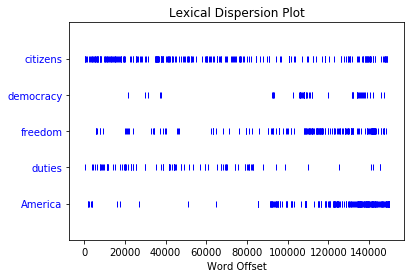

In [62]:
# beginning it appears. This positional of location of a word in the text  can be displayed using a dispersion plot
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [72]:
# let's try generating some random text in the various styles we have just seen
len(text1)

260819

In [73]:
len(text1)

260819

In [74]:
len(set(text1))

19317

In [85]:
(sorted(set(text3)))[1:20]

["'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech']

In [86]:
len(set(text3)) / len(text3)

0.06230453042623537

In [87]:
text3.count("smote")

5

In [88]:
100 * text4.count('a') / len(text4)

1.457973123627309

In [89]:
def lexical_diversity(text): return len(set(text)) / len(text)

def percentage(count, total): return 100 * count / total

In [90]:
lexical_diversity(text3)

0.06230453042623537

In [91]:
lexical_diversity(text5)

0.13477005109975562

## List

In [92]:
sent1 = ['Call', 'me', 'Ishmael', '.']

In [93]:
sent1

['Call', 'me', 'Ishmael', '.']

In [94]:
len(sent1)

4

In [95]:
lexical_diversity(sent1)

1.0

In [96]:
sent2 = ['The', 'family', 'of', 'Dashwood', 'had', 'long','been', 'settled', 'in', 'Sussex', '.']
sent3 = ['In', 'the', 'beginning', 'God', 'created', 'the','heaven', 'and', 'the', 'earth', '.']

In [97]:
# concatenation; it combines the lists together into a single list
sent2 + sent3

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.',
 'In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.']

What if we want to add a single item to a list? This is known as appending. When we append() to a list, the list itself
is updated as a result of the operation.

In [98]:
sent1.append("Some")
sent1

['Call', 'me', 'Ishmael', '.', 'Some']

## Indexing Lists

We instruct Python to show us the item that occurs at an index such as 173 in a text by writing the
name of the text followed by the index inside square brackets:

In [99]:
text4[173]

'awaken'

We can do the converse: Give a word then retrieve the index in the given text

In [101]:
text4.index('awaken')

173

Python permits us to access sublists as well, extracting manageable pieces of language from large texts, a technique known as slicing.

In [102]:
text3[16000:16020]

['Gaham',
 ',',
 'and',
 'Thahash',
 ',',
 'and',
 'Maachah',
 '.',
 'And',
 'Sarah',
 'was',
 'an',
 'hundred',
 'and',
 'seven',
 'and',
 'twenty',
 'years',
 'old',
 ':']

In [105]:
# print all the elements of list from index 3 to the end 
text1[3:]
#  print 2 first elements of list
text1[:3]

['[', 'Moby', 'Dick']

## Variable

In [109]:
my_variable  = text1[3:23]

In [111]:
len(sorted(my_variable))

20

## String

In [112]:
student = 'Henry'

In [113]:
student*2

'HenryHenry'

In [115]:
student + '!'

'Henry!'

We can join the words of a list to make a single string, or split a string into a list, as follows:

In [117]:
' '.join(['student','teacher'])

'student teacher'

In [118]:
'student teacher'.split()

['student', 'teacher']

# Computing with Language: Simple Statistics

## Frequency Distributions

In [120]:
dist = FreqDist(text3)
print(dist)

dist.most_common(50)

<FreqDist with 2789 samples and 44764 outcomes>


[(',', 3681),
 ('and', 2428),
 ('the', 2411),
 ('of', 1358),
 ('.', 1315),
 ('And', 1250),
 ('his', 651),
 ('he', 648),
 ('to', 611),
 (';', 605),
 ('unto', 590),
 ('in', 588),
 ('that', 509),
 ('I', 484),
 ('said', 476),
 ('him', 387),
 ('a', 342),
 ('my', 325),
 ('was', 317),
 ('for', 297),
 ('it', 290),
 ('with', 289),
 ('me', 282),
 ('thou', 272),
 ("'", 268),
 ('is', 267),
 ('thy', 267),
 ('s', 263),
 ('thee', 257),
 ('be', 254),
 ('shall', 253),
 ('they', 249),
 ('all', 245),
 (':', 238),
 ('God', 231),
 ('them', 230),
 ('not', 224),
 ('which', 198),
 ('father', 198),
 ('will', 195),
 ('land', 184),
 ('Jacob', 179),
 ('came', 177),
 ('her', 173),
 ('LORD', 166),
 ('were', 163),
 ('she', 161),
 ('from', 157),
 ('Joseph', 157),
 ('their', 153)]

In [121]:
dist['land']

184

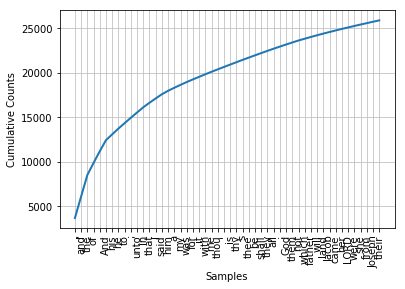

In [122]:
#We can generate a cumulative frequency plot for these words, using 
dist.plot(50, cumulative=True)

In [124]:
V = set(text1)
long_words = [w for w in V if len(w) > 18]
sorted(long_words)

['uninterpenetratingly']

In [127]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

Notice how we have used two conditions: len(w) > 7 ensures that the words are longer than seven letters, and
fdist5[w] > 7 ensures that these words occur more than seven times. At last we have managed to automatically
identify the frequently-occurring content-bearing words of the text. It is a modest but important milestone: a tiny piece
of code, processing tens of thousands of words, produces some informative output.

## Collocations and Bigrams

A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the
wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar
senses; for example, maroon wine sounds definitely odd.
To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as bigrams. This
is easily accomplished with the function bigrams():


In [129]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

 we want to find bigrams that occur more often than we would expect based on the frequency
of the individual words. The collocations() function does this for us

In [131]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; Old World; Almighty God; Fellow citizens; Chief
Magistrate; every citizen; one another; fellow Americans; Indian
tribes; public debt; foreign nations


## Counting Other Things
we can look at the distribution of word lengths in a text, as illustrated in the following example

In [132]:
[len(w) for w in text1]

fdist = FreqDist(len(w) for w in text1)


fdist


FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

In [133]:
fdist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

In [134]:
fdist.max()

3

In [135]:
fdist[3]

50223

In [136]:
fdist.freq(3)

0.19255882431878046

From this we see that the most frequent word length is 3, and that words of length 3 account for roughly 50,000 (or
20%) of the words making up the book. Although we will not pursue it here, further analysis of word length might
help us understand differences between authors, genres, or languages.

# Making Decisions and Taking Control

In [137]:
[w for w in sent7 if len(w) < 4]

[',', '61', 'old', ',', 'the', 'as', 'a', '29', '.']

In [138]:
[w for w in sent7 if len(w) <= 4]

[',', '61', 'old', ',', 'will', 'join', 'the', 'as', 'a', 'Nov.', '29', '.']

In [139]:
[w for w in sent7 if len(w) == 4]

['will', 'join', 'Nov.']

In [140]:
[w for w in sent7 if len(w) != 4]

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 '29',
 '.']

In [141]:
sorted(w for w in set(text1) if w.endswith('ableness'))

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [142]:
sorted(term for term in set(text4) if 'gnt' in term)

['Sovereignty', 'sovereignties', 'sovereignty']

In [145]:
sorted(item for item in set(text6) if item.istitle())[1:20]

['Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh',
 'Aaauugh',
 'Aagh',
 'Aah',
 'Aauuggghhh',
 'Aauuugh',
 'Aauuuuugh',
 'Aauuuves',
 'Action',
 'Actually',
 'African']

In [146]:
sorted(item for item in set(sent7) if item.isdigit())

['29', '61']

In [147]:
sorted(w for w in set(text7) if '-' in w and 'index' in w)


['Stock-index',
 'index-arbitrage',
 'index-fund',
 'index-options',
 'index-related',
 'stock-index']

In [148]:
sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10)


['Abelmizraim',
 'Allonbachuth',
 'Beerlahairoi',
 'Canaanitish',
 'Chedorlaomer',
 'Girgashites',
 'Hazarmaveth',
 'Hazezontamar',
 'Ishmeelites',
 'Jegarsahadutha',
 'Jehovahjireh',
 'Kirjatharba',
 'Melchizedek',
 'Mesopotamia',
 'Peradventure',
 'Philistines',
 'Zaphnathpaaneah']

In [149]:
sorted(w for w in set(sent7) if not w.islower())


[',', '.', '29', '61', 'Nov.', 'Pierre', 'Vinken']

In [150]:
sorted(t for t in set(text2) if 'cie' in t or 'cei' in t)

['ancient',
 'ceiling',
 'conceit',
 'conceited',
 'conceive',
 'conscience',
 'conscientious',
 'conscientiously',
 'deceitful',
 'deceive',
 'deceived',
 'deceiving',
 'deficiencies',
 'deficiency',
 'deficient',
 'delicacies',
 'excellencies',
 'fancied',
 'insufficiency',
 'insufficient',
 'legacies',
 'perceive',
 'perceived',
 'perceiving',
 'prescience',
 'prophecies',
 'receipt',
 'receive',
 'received',
 'receiving',
 'society',
 'species',
 'sufficient',
 'sufficiently',
 'undeceive',
 'undeceiving']

## Operating on Every Element

In [152]:
[len(w) for w in text1][1:20]

[4, 4, 2, 6, 8, 4, 1, 9, 1, 1, 8, 2, 1, 4, 11, 5, 2, 1, 7]

In [154]:
[w.upper() for w in text1][1:20]

['MOBY',
 'DICK',
 'BY',
 'HERMAN',
 'MELVILLE',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'SUPPLIED',
 'BY',
 'A',
 'LATE',
 'CONSUMPTIVE',
 'USHER',
 'TO',
 'A',
 'GRAMMAR']

In [155]:
len(set(word.lower() for word in text1))

17231

Now that we are not double-counting words like This and this, which differ only in capitalization, we've wiped 2,000
off the vocabulary count! We can go a step further and eliminate numbers and punctuation from the vocabulary count
by filtering out any non-alphabetic items:

In [156]:
len(set(word.lower() for word in text1 if word.isalpha()))

16948

## Nested Code Blocks

In [159]:
for word in ['Call', 'me', 'Hero', '.']:print(word)

Call
me
Hero
.


## Looping with Conditions

we can combine the if and for statements. We will loop over every item of the list, and print the item only if it
ends with the letter l. We'll pick another name for the variable to demonstrate that Python doesn't try to make sense of
variable names.

In [162]:
sent1 = ['Call', 'me', 'Hero', '.']
for xyzzy in sent1:
    if xyzzy.endswith('l'):
        print(xyzzy)

Call


We can also specify an action to be taken if the condition of the if statement is not met. Here we see the elif (else if)
statement, and the else statement. Notice that these also have colons before the indented code.

In [164]:
 for token in sent1:
    if token.islower():
        print(token, 'is a lowercase word')    
        
        
    elif token.istitle():
        print(token, 'is a titlecase word')
    else:
        print(token, 'is punctuation')

Call is a titlecase word
me is a lowercase word
Hero is a titlecase word
. is punctuation


In [166]:
tricky = sorted(w for w in set(text2) if 'tion' in w or 'cian' in w)
for word in tricky:
    print(word, end=' ')

Conversation Grecian Opposition Preparation Prescriptions Reflection abstraction accommodation accommodations accusation acquisition action actions addition additional additions admiration affectation affection affectionate affectionately affections affliction afflictions aggravation agitation alleviation alteration alterations ambition animation annihilation anticipation anticipations application approbation articulation assertion assertions attention attentions attraction attractions calculation caution celebration cessation circumspection collation collection commendation commiseration communication completion composition compunction conciliation condemnation condition conditioned conditions confirmation congratulations connection connections consideration considerations consolation consternation constitution constitutional construction consultation consumption continuation contraction contribution contrition conversation conversations conviction creation deception declaration dejec

# Automatic Natural Language Understanding

## Word Sense Disambiguation

In word sense disambiguation we want to work out which sense of a word was intended in a given context. Consider
the ambiguous words serve and dish:
- serve: help with food or drink; hold an office; put ball into play 
- dish: plate; course of a meal; communications device

In a sentence containing the phrase: he served the dish, you can detect that both serve and dish are being used with
their food meanings. It's unlikely that the topic of discussion shifted from sports to crockery in the space of three
words. This would force you to invent bizarre images, like a tennis pro taking out his or her frustrations on a china teaset laid out beside the court. In other words, we automatically disambiguate words using context, exploiting the simple
fact that nearby words have closely related meanings. As another example of this contextual effect, consider the word
by, which has several meanings, e.g.: the book by Chesterton (agentive — Chesterton was the author of the book); the
cup by the stove (locative — the stove is where the cup is); and submit by Friday (temporal — Friday is the time of the
submitting). Observe in (3c) that the meaning of the italicized word helps us interpret the meaning of by.

3. 
- The lost children were found by the searchers (agentive)
- The lost children were found by the mountain (locative)
- The lost children were found by the afternoon (temporal)

## Pronoun Resolution

A deeper kind of language understanding is to work out "who did what to whom" — i.e., to detect the subjects and
objects of verbs. You learnt to do this in elementary school, but it's harder than you might think. In the sentence the
thieves stole the paintings it is easy to tell who performed the stealing action. Consider three possible following
sentences in (4c), and try to determine what was sold, caught, and found (one case is ambiguous).


4. 

- The thieves stole the paintings. They were subsequently sold.
- The thieves stole the paintings. They were subsequently caught.
- The thieves stole the paintings. They were subsequently found.
Answering this question involves finding the antecedent of the pronoun they, either thieves or paintings.
Computational techniques for tackling this problem include anaphora resolution — identifying what a pronoun or
noun phrase refers to — and semantic role labeling — identifying how a noun phrase relates to the verb (as agent,
patient, instrument, and so on).



## Generating Language Output
If we can automatically solve such problems of language understanding, we will be able to move on to tasks that
involve generating language output, such as question answering and machine translation. In the first case, a
machine should be able to answer a user's questions relating to collection of texts:



5

- Text: ... The thieves stole the paintings. They were subsequently sold. ...
- Human: Who or what was sold?
- Machine: The paintings.
The machine's answer demonstrates that it has correctly worked out that they refers to paintings and not to thieves. In
the second case, the machine should be able to translate the text into another language, accurately conveying the
meaning of the original text. In translating the example text into French, we are forced to choose the gender of the
pronoun in the second sentence: ils (masculine) if the thieves are found, and elles (feminine) if the paintings are found.
Correct translation actually depends on correct understanding of the pronoun.

6 
- The thieves stole the paintings. They were subsequently found.
- Les voleurs ont volé les peintures. Ils ont été trouvés plus tard. (the thieves)
- Les voleurs ont volé les peintures. Elles ont été trouvées plus tard. (the paintings)
In all of these examples, working out the sense of a word, the subject of a verb, and the antecedent of a pronoun are
steps in establishing the meaning of a sentence, things we would expect a language understanding system to be able to
do.

## Machine translation

## Dialogue

## Limitations of NLP
Despite the research-led advances in tasks like RTE, natural language systems that have been deployed for real-world
applications still cannot perform common-sense reasoning or draw on world knowledge in a general and robust
manner. We can wait for these difficult artificial intelligence problems to be solved, but in the meantime it is necessary
to live with some severe limitations on the reasoning and knowledge capabilities of natural language systems.
Accordingly, right from the beginning, an important goal of NLP research has been to make progress on the difficult
task of building technologies that "understand language," using superficial yet powerful techniques instead of
unrestricted knowledge and reasoning capabilities. Indeed, this is one of the goals of this book, and we hope to equip
you with the knowledge and skills to build useful NLP systems, and to contribute to the long-term aspiration of
building intelligent machines.

# Accessing Text Corpora and Lexical Resources

Practical work in Natural Language Processing typically uses large bodies of linguistic data, or **corpora**. 

We begin by getting the Python interpreter to load the NLTK
package, then ask to see nltk.corpus.gutenberg.fileids(), the file identifiers in this corpus:

In [168]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [169]:
sense = nltk.corpus.gutenberg.words('austen-sense.txt')
len(sense)

141576

In [170]:
sense = nltk.Text(nltk.corpus.gutenberg.words('austen-sense.txt'))
sense.concordance("surprize")

no matches


In [171]:
from nltk.corpus import gutenberg
gutenberg.fileids()


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [172]:
sense = gutenberg.words('austen-sense.txt')

In [173]:
len(sense)

141576

Let's write a short program to display other information about each text, by looping over all the values of fileid
corresponding to the gutenberg file identifiers listed earlier and then computing statistics for each text. For a compact
output display, we will round each number to the nearest integer, using round().

In [174]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


This program displays three statistics for each text: average word length, average sentence length, and the number of
times each vocabulary item appears in the text on average (our lexical diversity score). Observe that average word length
appears to be a general property of English, since it has a recurrent value of 4. (In fact, the average word length is really 3
not 4, since the num_chars variable counts space characters.) By contrast average sentence length and lexical diversity
appear to be characteristics of particular authors.
The previous example also showed how we can access the "raw" text of the book , not split up into tokens. The raw()
function gives us the contents of the file without any linguistic processing. So, for example,
len(gutenberg.raw('blake-poems.txt')) tells us how many letters occur in the text, including the spaces between words.
The sents() function divides the text up into its sentences, where each sentence is a list of words:

In [175]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [180]:
longest_len = max(len(s) for s in macbeth_sentences)
[s for s in macbeth_sentences if len(s) == longest_len]

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

## Web and Chat Text
Although Project Gutenberg contains thousands of books, it represents established literature. It is important to consider
less formal language as well. NLTK's small collection of web text includes content from a Firefox discussion forum,
conversations overheard in New York, the movie script of Pirates of the Carribean, personal advertisements, and wine
reviews:

In [182]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...
